In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package

In [47]:
from osgeo import gdal

In [134]:
grib = gdal.Open('C:\\GFS_Samples\\20190104_201134_.grb')

In [174]:
band = grib.GetRasterBand(79)
data = band.ReadAsArray()

In [175]:
data.max()

44.0

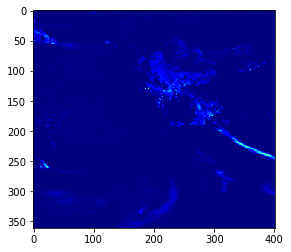

In [176]:
plt.imshow(data, cmap='jet')

In [165]:
number_of_bands = grib.RasterCount
print(number_of_bands)

138


In [166]:
ulx, xres, xskew, uly, yskew, yres  = grib.GetGeoTransform()
lrx = ulx + (grib.RasterXSize * xres)
lry = uly + (grib.RasterYSize * yres)
print("{} {} {} {}".format(ulx, uly, lrx, lry))

-120.125 36.509 -19.875 -11882.989


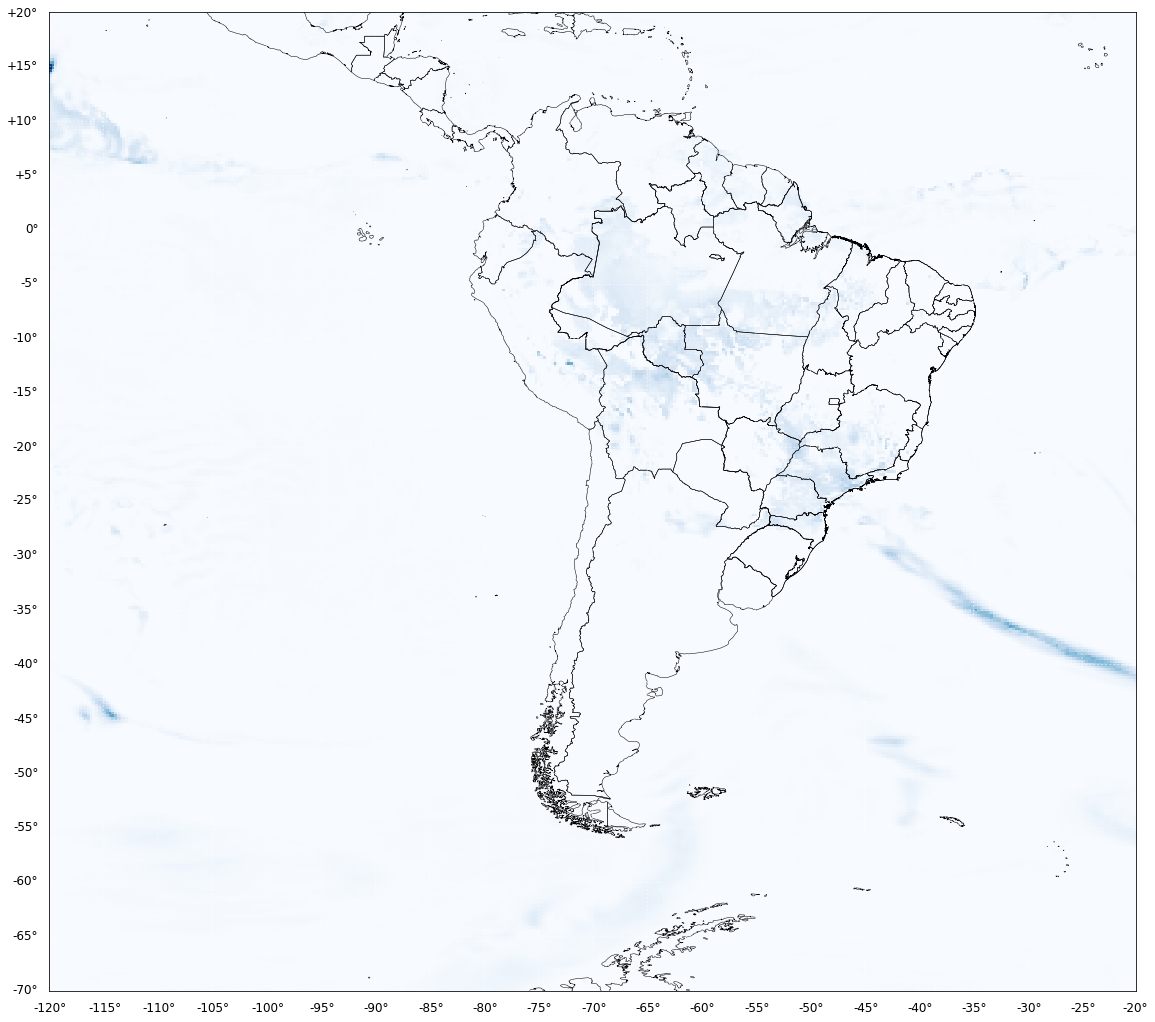

In [180]:
band = grib.GetRasterBand(79)
data = band.ReadAsArray()

#==============================================================================
# Plotting the data
#==============================================================================
# Create the basemap reference for the Rectangular Projection
plt.figure(figsize=(20,18))
extent = [-120.0, -70, -20, 20.0]
bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)
 
# Draw the countries and Brazilian states shapefiles
bmap.readshapefile('C:\\GFS_Samples\\BRA_adm1','BRA_adm1',linewidth=0.50,color='black')
bmap.readshapefile('C:\\GFS_Samples\\ne_10m_admin_0_countries','ne_10m_admin_0_countries',linewidth=0.50,color='black')

#bmap.drawcountries()
#bmap.drawcoastlines()

# Draw parallels and meridians
bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.5, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=12)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.0), linewidth=0.5, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=12)
 
# Plot the model information
bmap.imshow(data, origin='upper', cmap='Blues', aspect='equal')

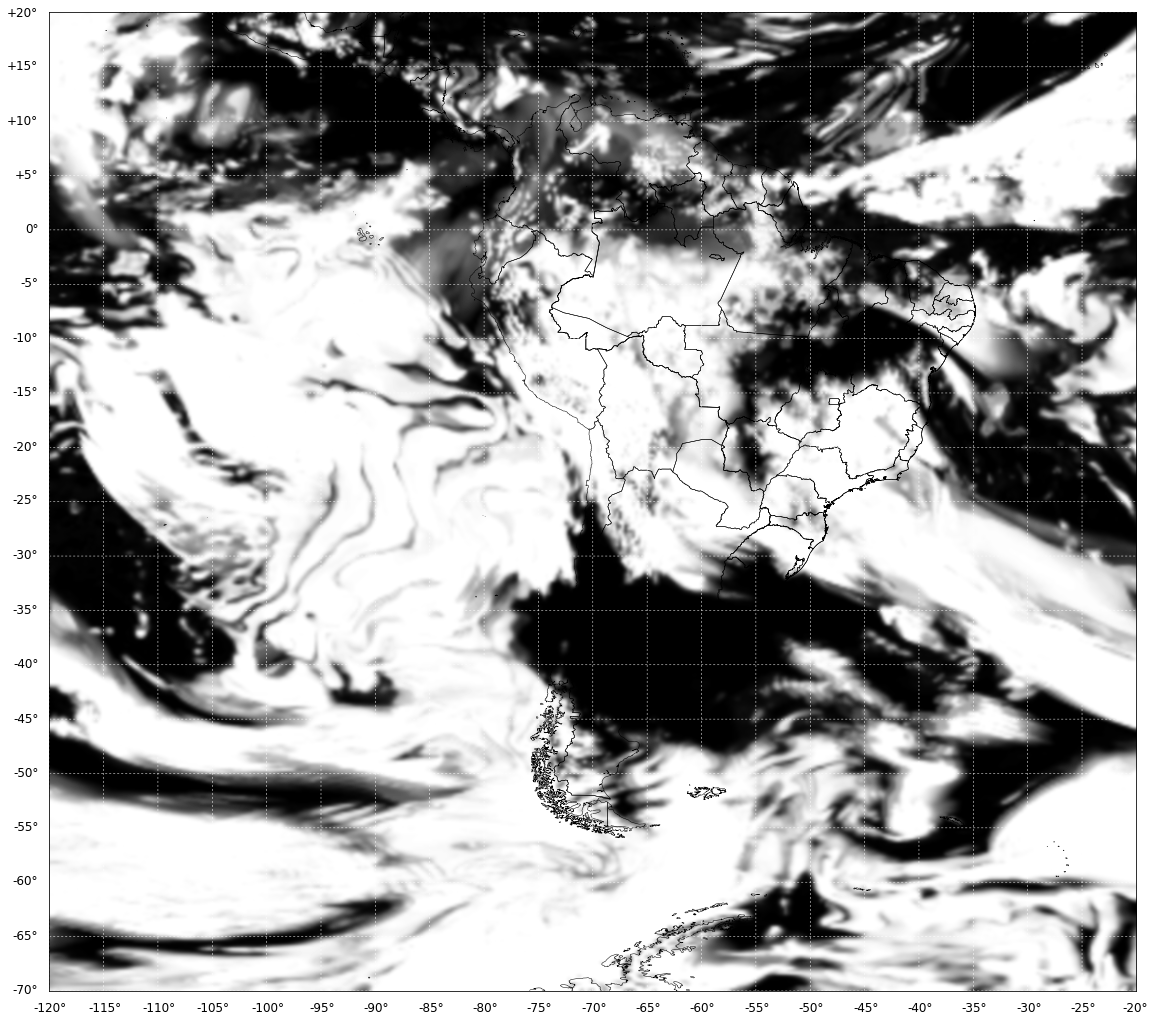

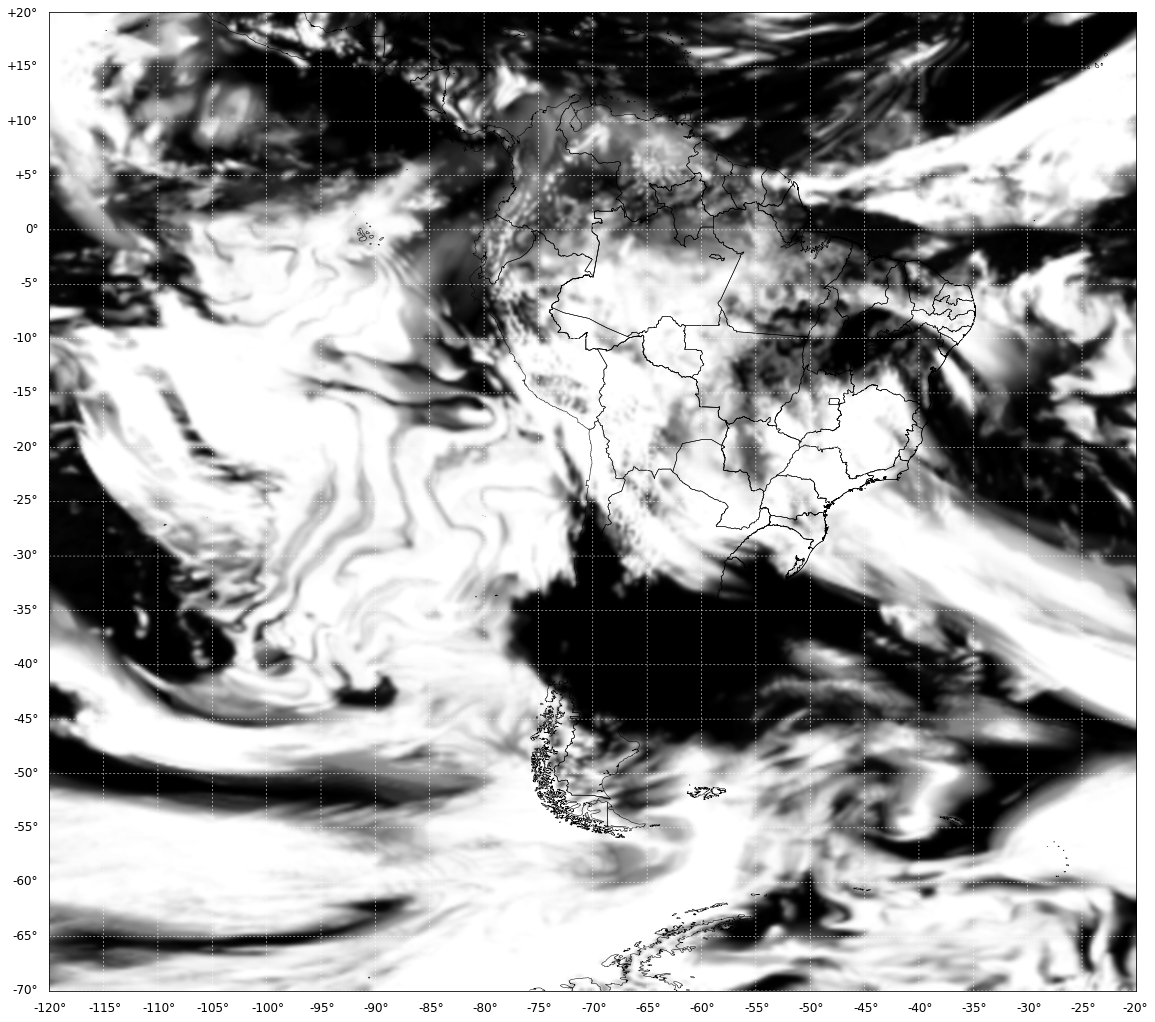

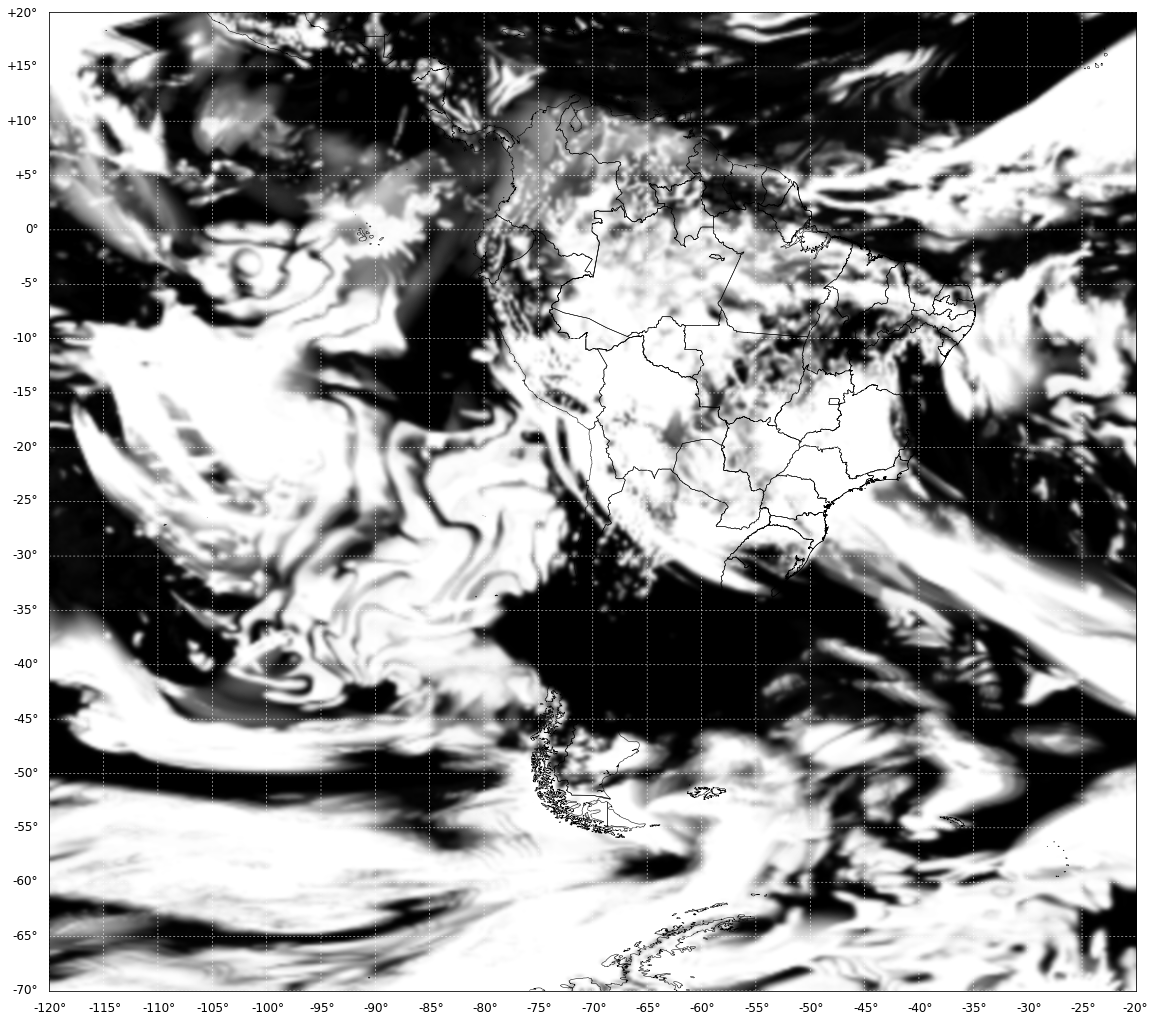

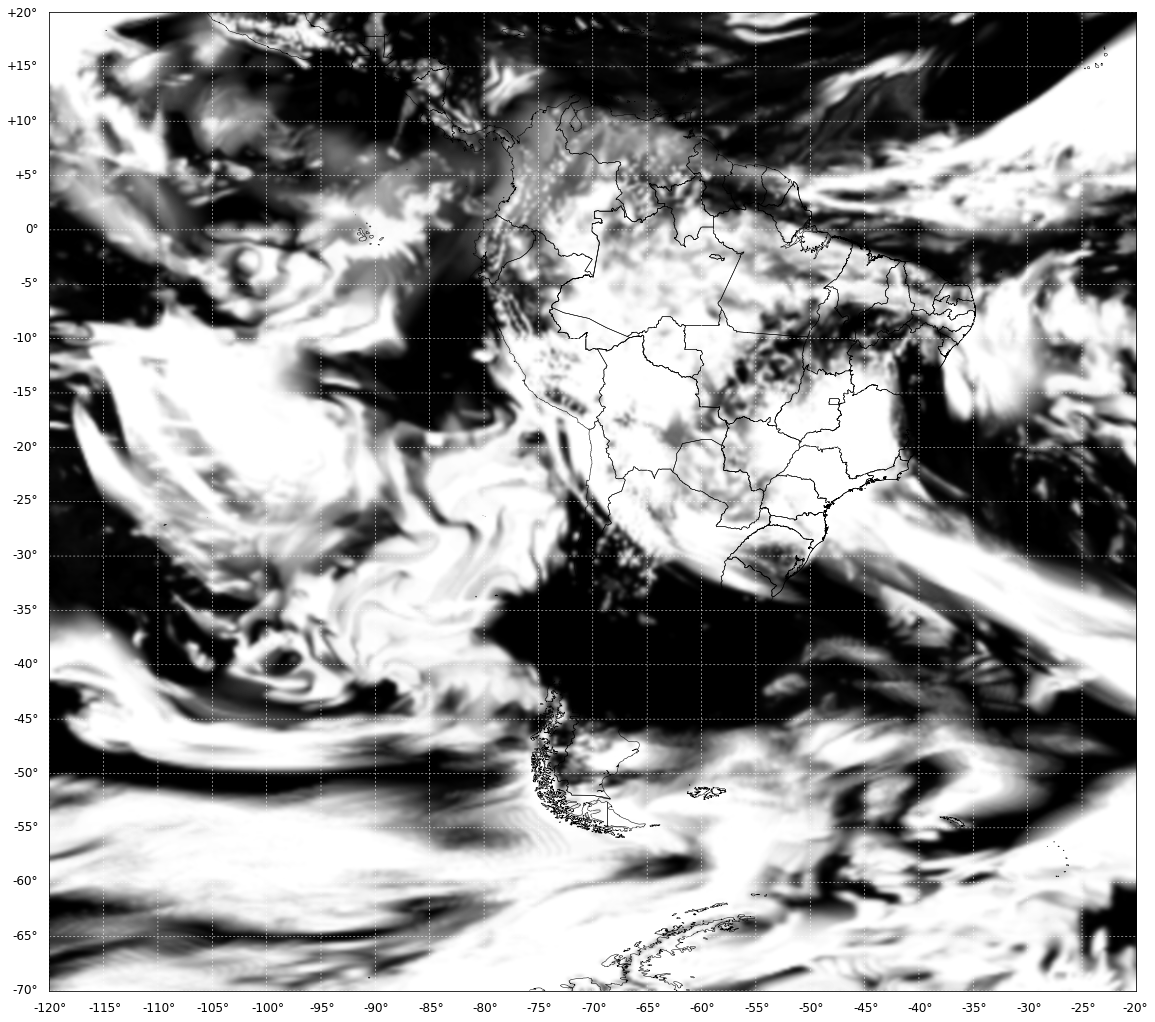

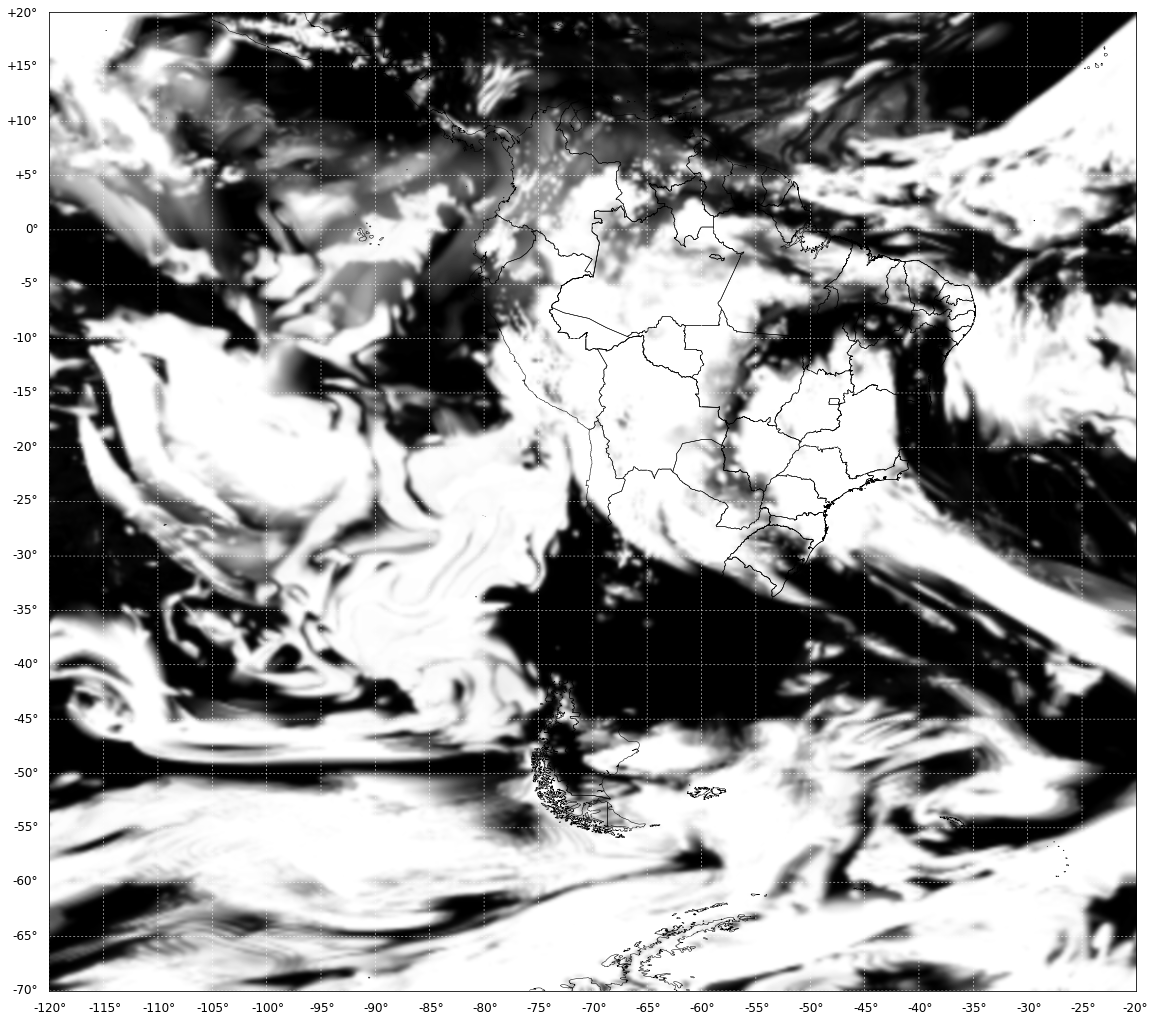

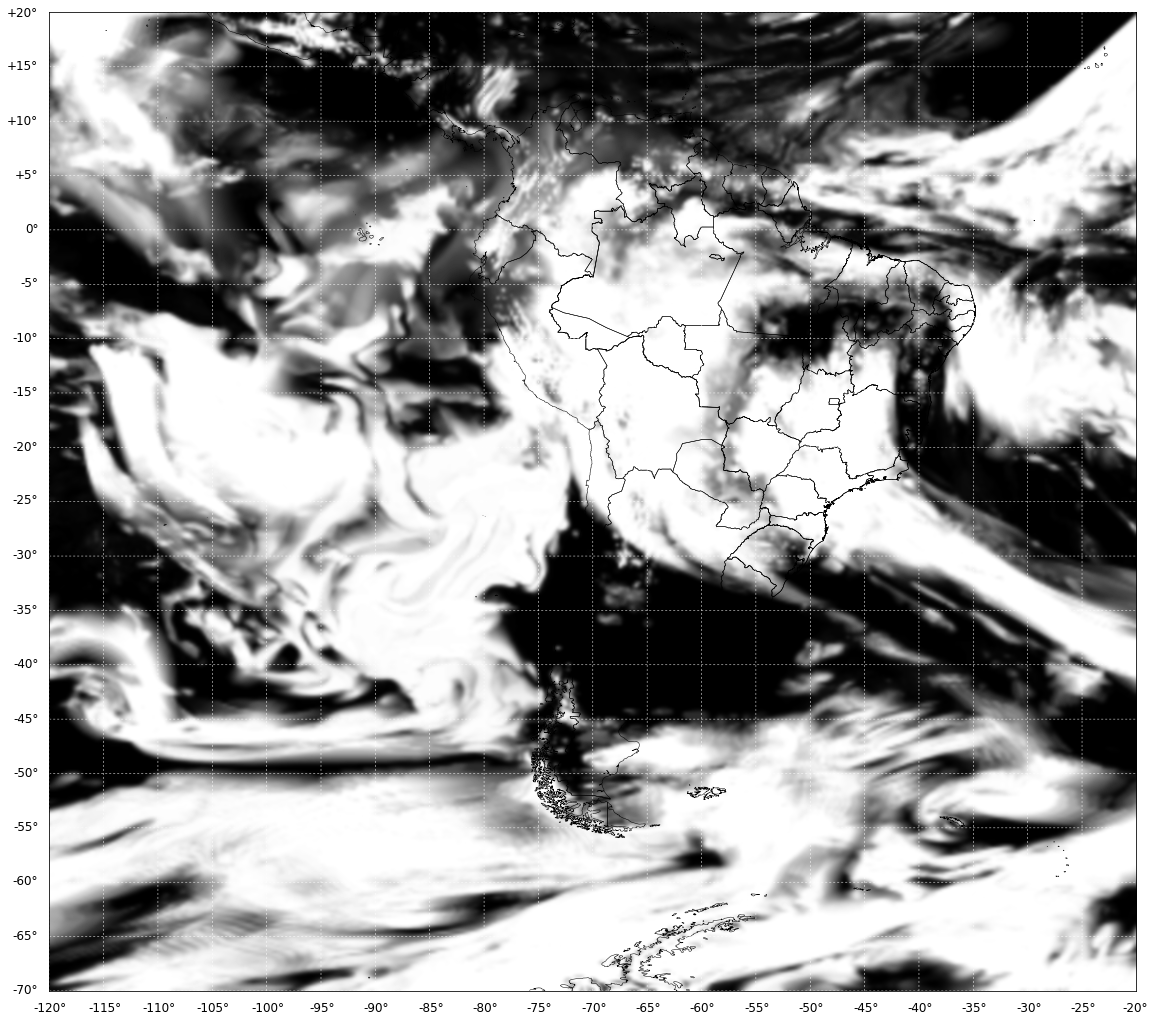

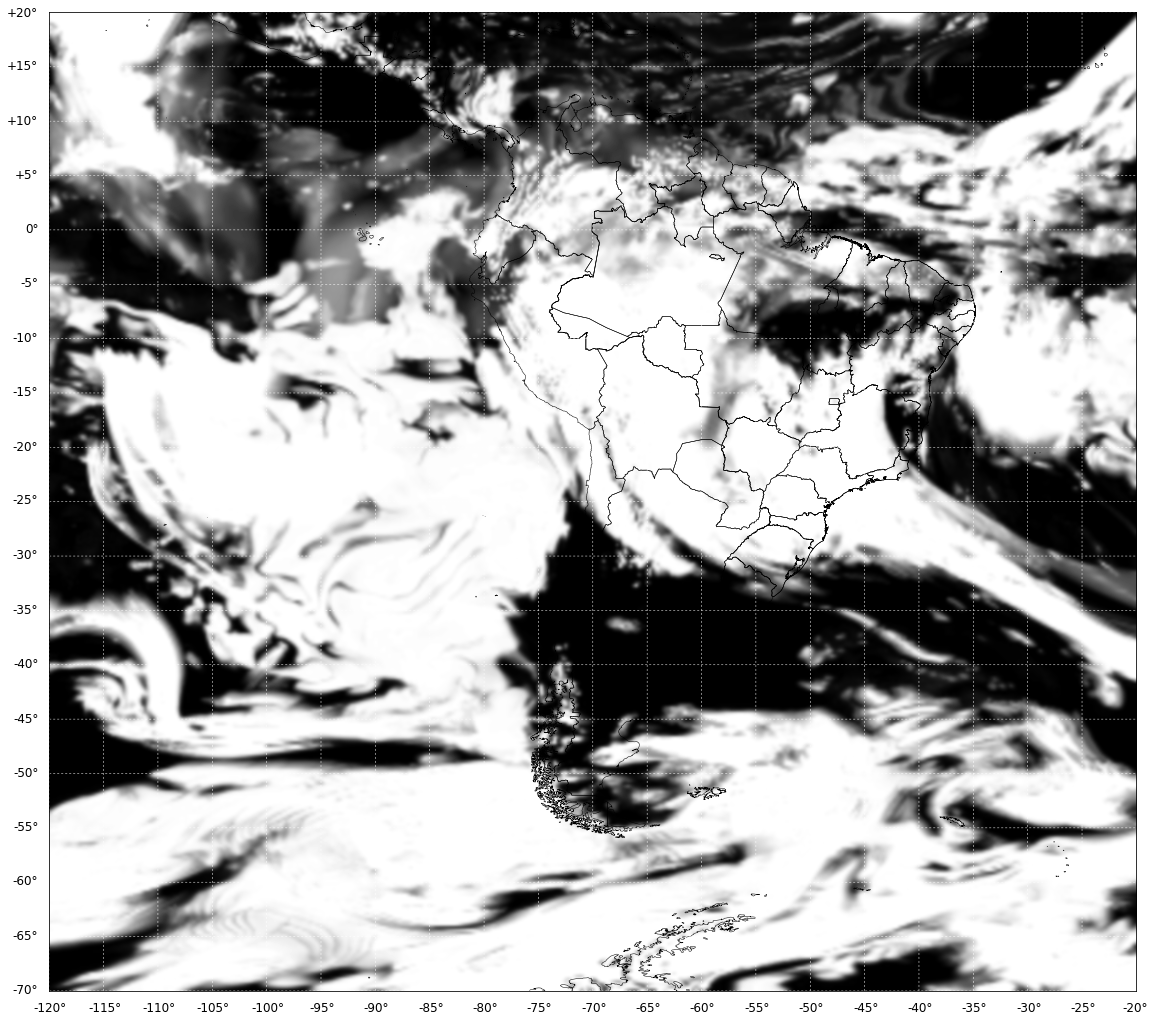

In [204]:
for i in range(1,8):
    band = grib.GetRasterBand(i)
    data = band.ReadAsArray()

    #==============================================================================
    # Plotting the data
    #==============================================================================
    # Create the basemap reference for the Rectangular Projection
    plt.figure(figsize=(20,18))
    extent = [-120.0, -70, -20, 20.0]
    bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)

    # Draw the countries and Brazilian states shapefiles
    bmap.readshapefile('C:\\GFS_Samples\\BRA_adm1','BRA_adm1',linewidth=0.50,color='black')
    bmap.readshapefile('C:\\GFS_Samples\\ne_10m_admin_0_countries','ne_10m_admin_0_countries',linewidth=0.50,color='black')

    #bmap.drawcountries()
    #bmap.drawcoastlines()

    # Draw parallels and meridians
    bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.5, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=12)
    bmap.drawmeridians(np.arange(0.0, 360.0, 5.0), linewidth=0.5, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=12)

    # Plot the model information
    
    image = bmap.imshow(data, origin='upper', cmap='gist_gray', aspect='equal', interpolation="bicubic")
    plt.savefig("C:\\nuvem{}.jpg".format(i))